In [1]:
import pandas as pd, warnings, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report,r2_score,confusion_matrix,plot_confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data_Science\Data\salaries.csv")
df['company'] = df['company'].map({'google':0,'abc pharma':1,'facebook':2})
df['job'] = df['job'].map({'sales executive':0,'business manager':1,'computer programmer':2})
df['degree'] = df['degree'].map({'bachelors':0,'masters':1})
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [3]:
def Plot_tree(model):
    plt.figure(figsize=(12,6))
    plot_tree(model,filled=True,class_names=['Bachelors','Master'])
    plt.show()

In [4]:
def Accuracy(model,X,y,name_accuracy):
    print('{}: {score:.2%}'.format(name_accuracy,score = model.score(X,y)))

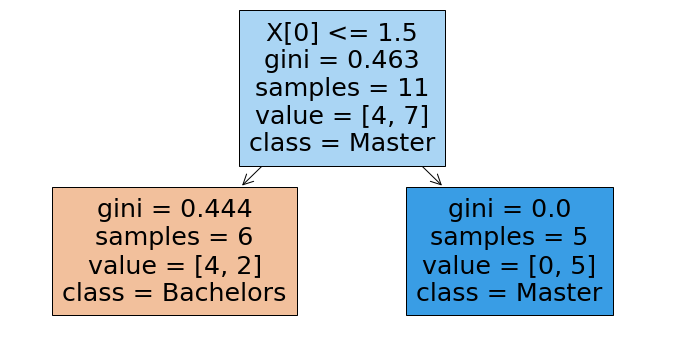

Test Accuracy: 60.00%
Train Accuracy: 81.82%


In [5]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train,y_train)
Plot_tree(model)
Accuracy(model,X_test,y_test,'Test Accuracy')
Accuracy(model,X_train,y_train,'Train Accuracy')

# ENTROPY

In [6]:
params = []
for a in range(1):
    params.append(int(input('Nhập số giá trị 1: ')))
    params.append(int(input('Nhập số giá trị 0: ')))
xs1 = params[0]/sum(params)
xs2 = params[1]/sum(params)
entropy = (-1)*(xs1*np.log2(xs1) + xs2*np.log2(xs2))
print('ENTROPY: {:.2f}'.format(entropy))

Nhập số giá trị 1: 2
Nhập số giá trị 0: 2
ENTROPY: 1.00


# GINI

In [7]:
params = []
for a in range(1):
    params.append(int(input('Nhập số giá trị 1: ')))
    params.append(int(input('Nhập số giá trị 0: ')))
gini = 1 - pow(params[0]/sum(params),2) - pow(params[1]/sum(params),2)
print('GINI_Impurity: {:.2f}'.format(gini))

Nhập số giá trị 1: 2
Nhập số giá trị 0: 2
GINI_Impurity: 0.50


In [8]:
params = []
for a in range(1):
    params.append(int(input('Nhập số giá trị 1: ')))
    params.append(int(input('Nhập số giá trị 0: ')))
    params.append(int(input('Nhập số giá trị 2: ')))
gini = 1 - pow(params[0]/sum(params),2) - pow(params[1]/sum(params),2) - pow(params[2]/sum(params),2)
print('GINI_Impurity: {:.2f}'.format(gini))

Nhập số giá trị 1: 5
Nhập số giá trị 0: 6
Nhập số giá trị 2: 8
GINI_Impurity: 0.65


# INFORMATION GAIN

In [9]:
def information_gain(a,b,c,d,e,f):
    tong = sum([a,b])
    tong1 = c+d
    tong2 = e+f
    infor_gain = entropy(a,b) - (entropy(c,d)*tong1/tong + entropy(e,f)*tong2/tong)
    return infor_gain

In [10]:
def entropy(x,y):
    xs1 = x/(x+y)
    xs2 = y/(x+y)
    entropy = (-1)*(xs1*np.log2(xs1) + xs2*np.log2(xs2))
    return entropy

In [11]:
for _ in range(1):
    root1 = float(input('Nhập số giá trị Root 1: '))
    root0 = float(input('Nhập số giá trị Root 0: '))
    quanlity11 = int(input('Nhập số giá trị 1-1: '))
    quanlity10 = int(input('Nhập số giá trị 1-0: '))
    quanlity01 = int(input('Nhập số giá trị 0-1: '))
    quanlity00 = int(input('Nhập số giá trị 0-0: '))
print(information_gain(root1,root0,quanlity11,quanlity10,quanlity01,quanlity00))

Nhập số giá trị Root 1: 1
Nhập số giá trị Root 0: 2
Nhập số giá trị 1-1: 5
Nhập số giá trị 1-0: 6
Nhập số giá trị 0-1: 7
Nhập số giá trị 0-0: 8
-7.710439767935867
